In [47]:
# Importing the libraries

import pandas as pd
import numpy as np
import seaborn as sns;
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline


In [48]:
df = pd.read_csv('E:\Test trail\Data\HR_comma_sep.csv.txt')

df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [49]:
df.rename(columns={'sales':'dept'}, inplace=True)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [50]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [51]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
dept                      object
salary                    object
dtype: object

In [52]:
df.dept.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: dept, dtype: int64

In [53]:
#Checking for Null Values

df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
dept                     0
salary                   0
dtype: int64

In [54]:
label_ec = LabelEncoder()
dept = label_ec.fit_transform(df.dept)


In [55]:
onehot_ec = OneHotEncoder()
ohe_dept = onehot_ec.fit_transform(dept.reshape(-1,1))
onehot_ec

OneHotEncoder()

In [56]:
label_ec.classes_


array(['IT', 'RandD', 'accounting', 'hr', 'management', 'marketing',
       'product_mng', 'sales', 'support', 'technical'], dtype=object)

In [57]:

dept_df = pd.DataFrame(ohe_dept.toarray(), dtype=int,columns=label_ec.classes_)
df['salary_tf'] = df.salary.map({'low':1,'medium':2,'high':3})

In [58]:

df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'dept', 'salary', 'salary_tf'],
      dtype='object')

<AxesSubplot: ylabel='Density'>

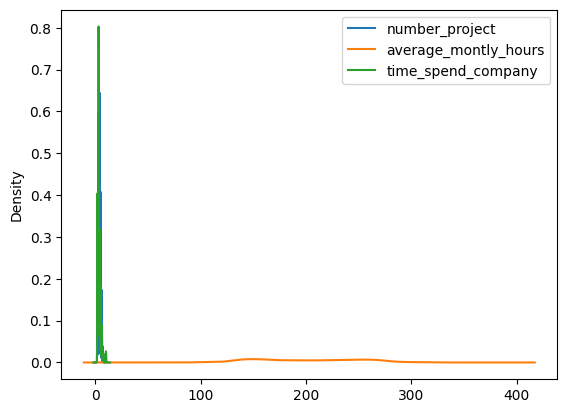

In [59]:
data =df[['number_project','average_montly_hours', 'time_spend_company']]
data.plot.kde()

In [62]:
minmax_scaler = MinMaxScaler()
scaled_np = minmax_scaler.fit_transform(data)
dept_np = dept_df.values
emp_df = df[['satisfaction_level','last_evaluation','Work_accident','promotion_last_5years','salary_tf']]
emp_np = emp_df.values
feature_data = np.hstack([emp_np, scaled_np, dept_np])
target_data = df.left
feature_data.shape

(14999, 18)

In [63]:
target_data.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [64]:
from sklearn.linear_model import LogisticRegression, SGDClassifier, PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier

In [65]:
models = [ LogisticRegression(class_weight='balanced'), SGDClassifier(max_iter=10), PassiveAggressiveClassifier(max_iter=20), RandomForestClassifier(n_estimators=20)]

In [66]:
# Splitting Train test

X_train,X_test,y_train,y_test = train_test_split(feature_data,target_data)

In [72]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.8053333333333333

In [75]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.996

In [81]:
from sklearn.metrics import recall_score,precision_score, f1_score, classification_report

pred = rf.predict(X_test)
precision_score(y_pred=pred, y_true=y_test)


0.9951573849878934

In [82]:
f1_score(y_pred=pred, y_true=y_test)

0.9909584086799277

In [84]:
print (classification_report(y_pred=pred, y_true=y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2917
           1       1.00      0.99      0.99       833

    accuracy                           1.00      3750
   macro avg       1.00      0.99      0.99      3750
weighted avg       1.00      1.00      1.00      3750



In [86]:
for model in models:
    model.fit(X_train,y_train)
    print (model.score(X_test,y_test))

0.7536
0.8133333333333334
0.7968
0.9946666666666667


c:\Users\vmraj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
